## Geographic features on large-scale maps ##

### Introduction ###

Matplotlib, Iris and Cartopy provide between them a rich and varied plotting environment for Python. However they can be confusing to use because of the apparent similarities between them and the large number of functions, methods and keyword arguments involved.

Examples of things almost always make them easier, so to aid usage of matplotlib, Iris and Cartopy, here is an example focussing on **adding geographic features to a Cartopy map**.

As usual, let's import the libraries we need and check the version of Cartopy that we are using.

In [1]:
import matplotlib.pyplot as plt

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat

print(cartopy.__version__)

0.23.0


### Quick and easy mapping ###

With Cartopy we can very easily generate a plot onto which we can draw various forms of data including, but not limited to, weather and climate data from Iris cubes, shapefiles, and image files.

The simplest example of this is to make a world map:

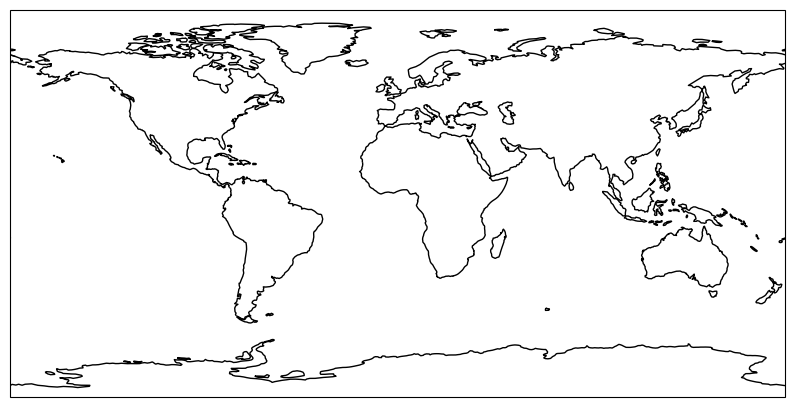

In [2]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.show()

What is not necessarily so clear is why this works. When the `projection` keyword argument is supplied to `plt.axes()` it has the effect of changing the resulting type of axes to a Cartopy `GeoAxes` type rather than the usual matplotlib `Axes` type. This Cartopy type inherits from the matplotlib `Axes` type but includes some additional methods. These methods provide a straightforward way for users to add features to geographic plots; in fact, the `coastlines` method used above is an example of one of these methods.

Let's demonstrate these ideas:

In [3]:
mpl_ax = plt.axes()
carto_ax = plt.axes(projection=ccrs.Mercator())
msg = '{} axes: {}, has coastlines method: {}'
print (msg.format('Matplotlib', type(mpl_ax), hasattr(mpl_ax, 'coastlines')))
print (msg.format('Cartopy', type(carto_ax), hasattr(carto_ax, 'coastlines')))

plt.close()  # Prevents iPython evaluating the axes calls and drawing an empty axes.

Matplotlib axes: <class 'matplotlib.axes._axes.Axes'>, has coastlines method: False
Cartopy axes: <class 'cartopy.mpl.geoaxes.GeoAxes'>, has coastlines method: True


There are a very wide range of features that may be added to a Cartopy GeoAxesSubplot and many modifications that can be made, using keyword arguments, to features that are added.

To demonstrate this, let's redraw the first map but this time add colour to both the oceans and the land, and add grey dotted lines to indicate country borders.

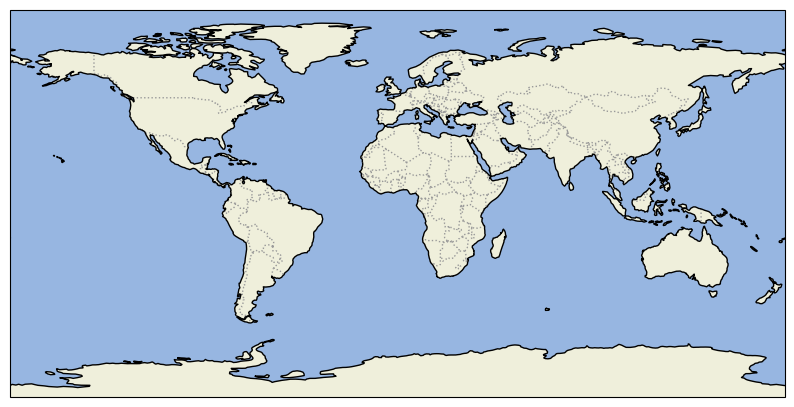

In [4]:
border_clr = (0.6, 0.6, 0.6)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.BORDERS, edgecolor=border_clr, linestyle=':')
ax.add_feature(cfeat.COASTLINE)
plt.show()

### Adjusting our map ###

Notice how it's already coloured? Cartopy's `feature` module automatically adds colour to the predefined features `OCEAN` and `LAND` to make using these features as simple as possible. However this doesn't mean that these colours are fixed, as these defaults can be overridden in the `add_feature` call, as I've done for borders in the above example.

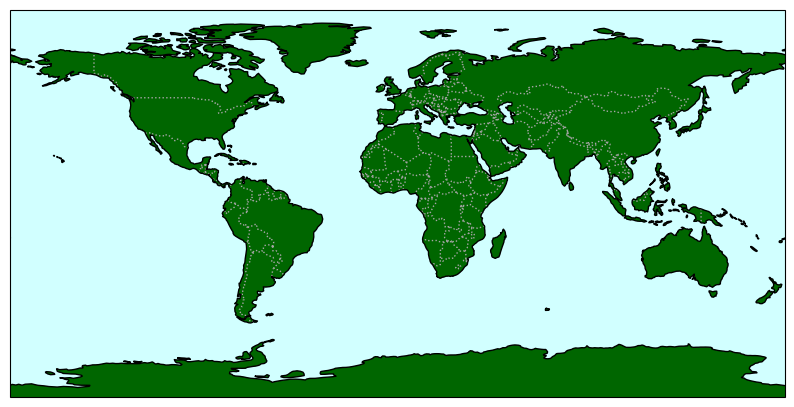

In [5]:
sea_blue = '#d1ffff'
land_green = '#006600'
ctry_light_grey = '#a6a6a6'

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.OCEAN, facecolor=sea_blue)
ax.add_feature(cfeat.LAND, facecolor=land_green)
ax.add_feature(cfeat.BORDERS, edgecolor=ctry_light_grey, linestyle=':')
ax.add_feature(cfeat.COASTLINE)

plt.show()

### Zooming in ###

Now let's zoom in on a smaller area bounded by the min and max lats and lons defined below. Into this smaller area we will add some more, different, features to the map, including those that haven't been predefined in Cartopy's `feature` module.

Let's also define a shapely polygon from these values. We can add it to the map using another of Cartopy's axes methods and use it to illustrate the area that we are about to zoom in on. The method we'll use to do this is `add_geometries()`. It takes two arguments - an iterable of the shapely geometries to be added and the coordinate reference system in which the geometries are defined. In this case the geometries are also defined in Plate Carr&eacute;e but this still needs to be specified.

In [6]:
import shapely.geometry

latmin, latmax = -1.5, 21.5
lonmin, lonmax = 75., 108.
box = shapely.geometry.box(lonmin, latmin, lonmax, latmax)

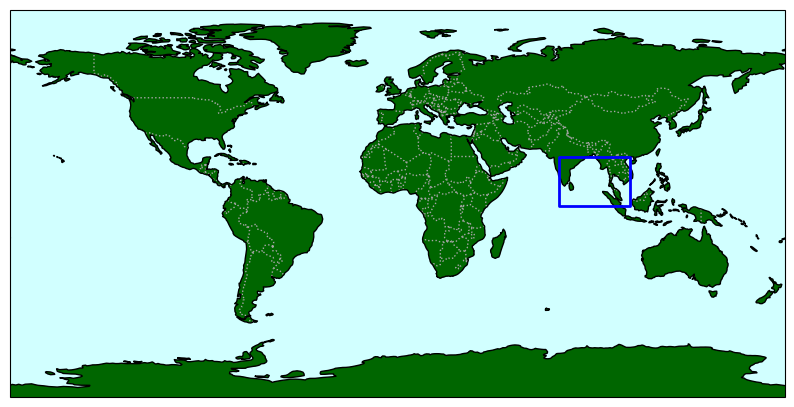

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.OCEAN, facecolor=sea_blue)
ax.add_feature(cfeat.LAND, facecolor=land_green)
ax.add_feature(cfeat.BORDERS, edgecolor=ctry_light_grey, linestyle=':')
ax.add_feature(cfeat.COASTLINE)
ax.add_geometries([box], ccrs.PlateCarree(),
                  facecolor='none', edgecolor='b', linewidth=2)
plt.show()

To limit the plotted extent we can use the `set_extent()` method:

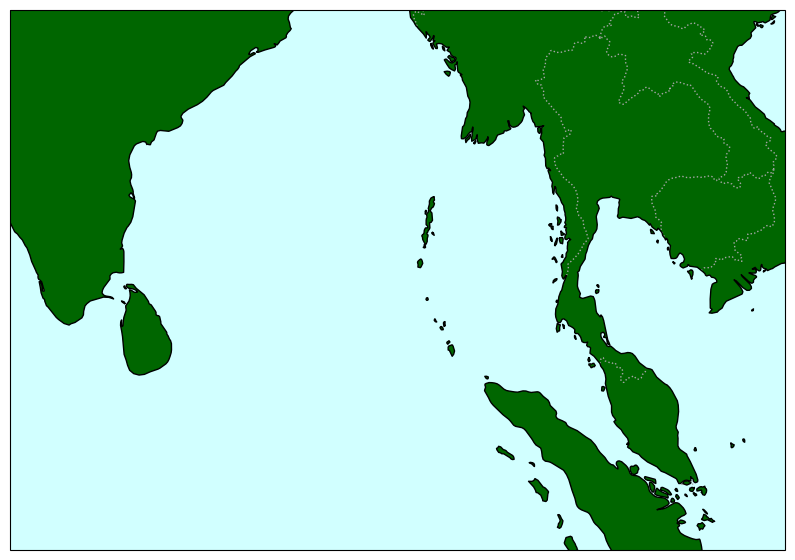

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((lonmin, lonmax, latmin, latmax), crs=ccrs.PlateCarree())
ax.add_feature(cfeat.OCEAN, facecolor=sea_blue)
ax.add_feature(cfeat.LAND, facecolor=land_green)
ax.add_feature(cfeat.BORDERS, edgecolor=ctry_light_grey, linestyle=':')
ax.add_feature(cfeat.COASTLINE)
plt.show()

The increased zoom shows up the lower resolution of the features, which is 1:110m in Cartopy's predefined features. We cannot change the resolution of the predefined features but we can create higher resolution alternatives and add them instead. This is done by instantiating a Cartopy `NaturalEarthFeature` for each feature we wish to add.

The NaturalEarthFeature class automatically obtains the necessary Natural Earth shapefile data (either from a local cache or by downloading it from the internet). Each feature is defined using three strings:

  * Category: natural earth data is categorised as either *cultural* or *physical* data.
  * Name: the name of a dataset within the chosen category.
  * Scale: the scale of the data to use. Choose one of '10m', '50m', or '110m'.
  
The selection of available natural earth datasets may be determined by browsing the [downloads](http://www.naturalearthdata.com/downloads/) section of the natural earth website.

I also introduce another keyword argument, `zorder`, below. This sets the z-order (plotting order) of a given item added to the axes, with bigger numbers meaning it will be plotted further up, as it were. Negative numbers can also be specified to indicate that an item should be plotted below other items.

Items are added to an axes in the order they appear in the code. Thus, in the example below, oceans will be plotted below land, which will be plotted below the borders and typically the coastlines would be plotted below all of these meaning they would not appear at all having been completely overdrawn by the other items. The benefit of using zorder is that if you need to add an item out of sequence for some reason you can force it to be drawn above or below other items as required.

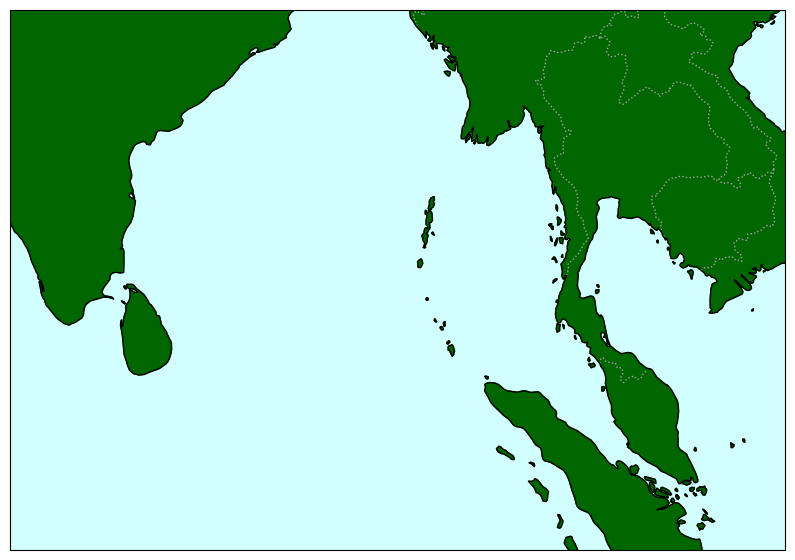

In [9]:
scale = '50m'

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((lonmin, lonmax, latmin, latmax), crs=ccrs.PlateCarree())
ax.coastlines(scale, zorder=5)

oceans = cfeat.NaturalEarthFeature('physical', 'ocean', scale,
                                   edgecolor='face', facecolor=sea_blue)
land = cfeat.NaturalEarthFeature('physical', 'land', scale,
                                 edgecolor='face', facecolor=land_green)
borders = cfeat.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land',
                                    scale, linestyle=':',
                                    edgecolor=ctry_light_grey, facecolor='none')

ax.add_feature(oceans)
ax.add_feature(land)
ax.add_feature(borders)

plt.show()

### More geographic features ###

Now let's add more examples of natural earth data to this smaller area plot. Natural earth data includes rivers, lakes and major roads, so we will add each of these. In order to make them visible we will also return to the default colour scheme as used for the first coloured map. Transport routes only exist at 1:10m scale so we will use this scale for roads.

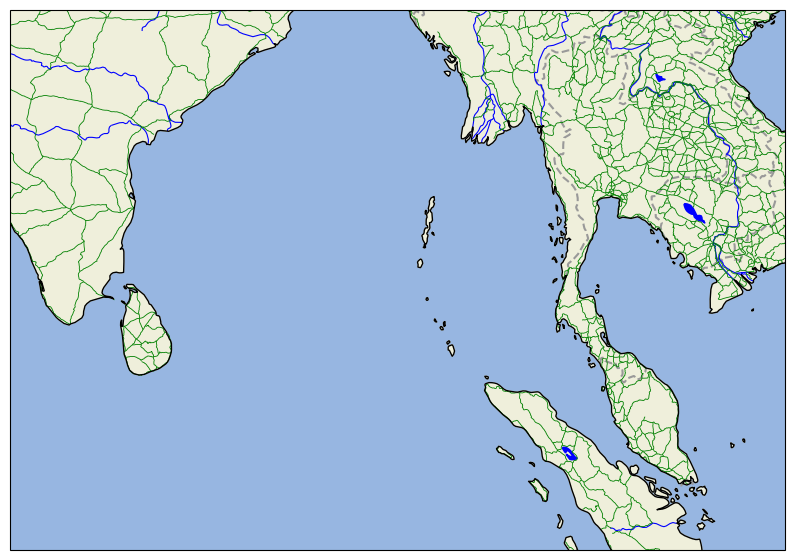

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((lonmin, lonmax, latmin, latmax), crs=ccrs.PlateCarree())
ax.coastlines(scale, zorder=5)

# Add the geographical features as before.
oceans = cfeat.NaturalEarthFeature('physical', 'ocean', scale,
                                   edgecolor='face', facecolor=cfeat.COLORS['water'])
land = cfeat.NaturalEarthFeature('physical', 'land', scale,
                                 edgecolor='face', facecolor=cfeat.COLORS['land'])
borders = cfeat.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land',
                                    scale, linestyle='--', linewidth=1.5,
                                    edgecolor=border_clr, facecolor='none')
ax.add_feature(oceans)
ax.add_feature(land)
ax.add_feature(borders)

# And add some more features.
rivers = cfeat.NaturalEarthFeature('physical', 'rivers_lake_centerlines', scale,
                                   edgecolor='b', facecolor='none', linewidth=0.8)
lakes = cfeat.NaturalEarthFeature('physical', 'lakes', scale,
                                  edgecolor='face', facecolor='b')
roads = cfeat.NaturalEarthFeature('cultural', 'roads', '10m',
                                  edgecolor='g', facecolor='none', linewidth=0.6)
ax.add_feature(rivers)
ax.add_feature(lakes)
ax.add_feature(roads)

plt.show()